# Installation of Libraries and Loading Dataset


In [1]:
# 4AI3 - Final Project - Group 5 - Project 3: Loan Prediction

# Step 1 - Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [2]:
# Step 2 - Load the test dataset

url = "/content/LoanPredictionDataset1.csv"
df = pd.read_csv(url)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Step 3 - Explore the test dataset

#df.shape
#df.describe()
#df.columns
#df.info()

# Preprocess and Visualize the Data

In [4]:
# Step 4 - Preprocess the data (remove blank/NaN values)

df.replace('', np.nan, inplace=True)
df = df.dropna()
df = df.copy()
df.drop('Loan_ID', axis=1, inplace=True)
df = df.reset_index(drop=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
475,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
476,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
477,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
478,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
# Step 5 - Map the Test Dataset to Convert all Strings into Integers.

df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Married'] = df['Married'].map({'Yes':1, 'No':0})
df['Dependents'] = df['Dependents'].map({'3+':3, '2':2, '1':1, '0':0})
df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1, 'No':0})

df_float_columns_to_convert = ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df[df_float_columns_to_convert] = df[df_float_columns_to_convert].astype('int64')

df['Property_Area'] = df['Property_Area'].map({'Urban':2, 'Semiurban':1, 'Rural':0})
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,0,4583,1508,128,360,1,0,0
1,1,1,0,1,1,3000,0,66,360,1,2,1
2,1,1,0,0,0,2583,2358,120,360,1,2,1
3,1,0,0,1,0,6000,0,141,360,1,2,1
4,1,1,2,1,1,5417,4196,267,360,1,2,1


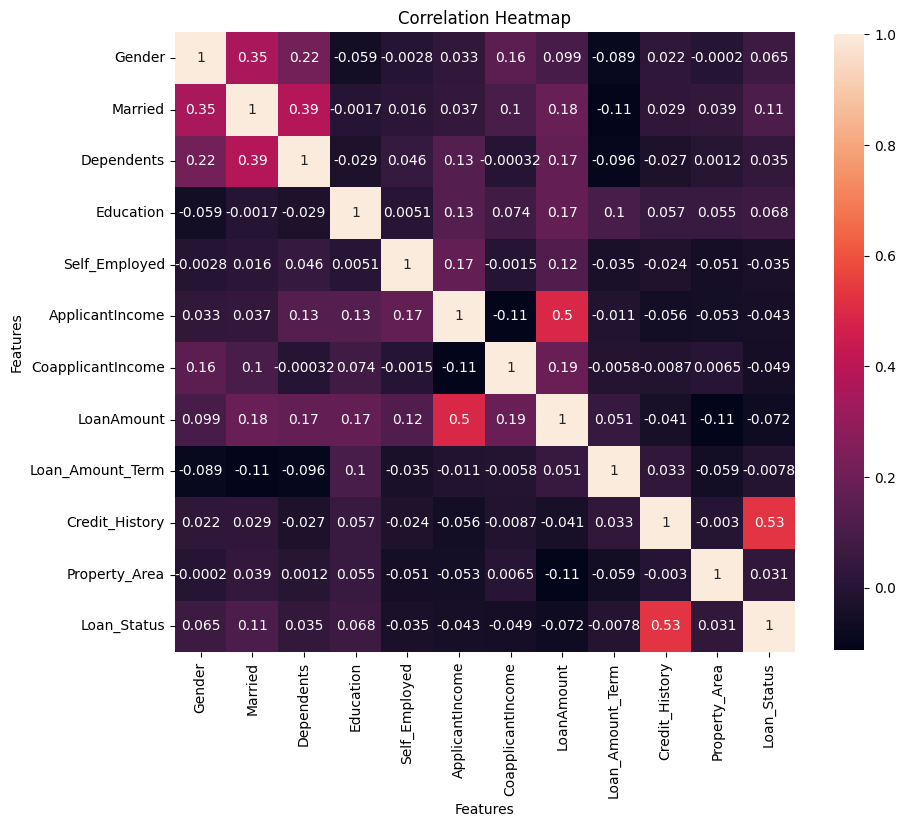

In [6]:
# Step 6 - Visualize the Test Dataset

corr = df.corr()
plt.figure(figsize=(10, 10))
#Source: https://pythonbasics.org/seaborn-heatmap/
sns.heatmap(corr, annot=True, square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

# Explore Feature Selection

In [7]:
# Step 7 - Explore feature selection. Select top 5 features with the strongest correlation to Loan_Status using SelectKBest.

X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

num_features = 5  # Number of top features to select
selector = SelectKBest(f_classif, k=num_features)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print(f"Selected Features: {selected_features}")

Selected Features: Index(['Gender', 'Married', 'Education', 'LoanAmount', 'Credit_History'], dtype='object')


# Split and Normalize the Dataset

In [8]:
# Step 8 - Train_Test_Split the Test Dataset

new_df = df[selected_features].copy()
new_df['Loan_Status'] = df['Loan_Status']

X_new = new_df.drop(['Loan_Status'], axis=1)
y_new = new_df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (384, 5)
X_test shape: (96, 5)
y_train shape: (384,)
y_test shape: (96,)


In [9]:
# Step 9 - Normalize the Test Dataset.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection

In [10]:
# Step 10 - Explore Various Algorithsm that can Predict the Loan and Find the Best Model.

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

# Evaluation of Models

In [11]:
# Step 11 - Make a Classification Report to Find the Best Model to Predict the Loan.

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_predict = model.predict(X_test_scaled)

    print(f"{model_name} Classification Report:")
    #Source: https://www.projectpro.io/recipes/generate-classification-report-and-confusion-matrix-in-python
    print(classification_report(y_test, y_predict))
    acc_score = accuracy_score(y_test, y_predict)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_predict)
    print(f"{model_name} Confusion Matrix:")
    print(cm)

    print(f"{model_name} Accuracy Score: {round(acc_score * 100, 2)}%\n")


best_model_name = max(models, key=lambda k: accuracy_score(y_test, models[k].predict(X_test_scaled)))
best_model = models[best_model_name]


print(best_model)
print(f"The best model is {best_model} with an accuracy score of {round(acc_score * 100, 2)}%")

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96

LogisticRegression Confusion Matrix:
[[11 17]
 [ 0 68]]
LogisticRegression Accuracy Score: 82.29%

KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.43      0.53        28
           1       0.80      0.93      0.86        68

    accuracy                           0.78        96
   macro avg       0.75      0.68      0.70        96
weighted avg       0.77      0.78      0.76        96

KNeighborsClassifier Confusion Matrix:
[[12 16]
 [ 5 63]]
KNeighborsClassifier Accuracy Score: 78.12%

SVC Classification Report:
              precision    reca

# Train the Model to Predict the Loan



In [12]:
# Step 12 - Load the Real Dataset

url2 = "/content/LoanPredictionDataset2.csv"
testdf = pd.read_csv(url2)

testdf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [13]:
# Step 13 - Preprocess the Real Dataset (remove blank/NaN values)

testdf = testdf.copy()
testdf.replace('', np.nan, inplace=True)
testdf = testdf.dropna()
testdf.drop('Loan_ID', axis=1, inplace=True)
testdf = testdf.reset_index(drop=True)
testdf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
4,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
284,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
285,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
286,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
287,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [14]:
# Step 14 - Map the Real Dataframe to Convert all Strings into Integers.

testdf['Gender'] = testdf['Gender'].map({'Male':1, 'Female':0})
testdf['Married'] = testdf['Married'].map({'Yes':1, 'No':0})
testdf['Dependents'] = testdf['Dependents'].map({'3+':3, '2':2, '1':1, '0':0})
testdf['Education'] = testdf['Education'].map({'Graduate':1, 'Not Graduate':0})
testdf['Self_Employed'] = testdf['Self_Employed'].map({'Yes':1, 'No':0})

float_columns_to_convert = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
testdf[float_columns_to_convert] = testdf[float_columns_to_convert].astype('int64')

testdf['Property_Area'] = testdf['Property_Area'].map({'Urban':2, 'Semiurban':1, 'Rural':0})

testdf.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110,360,1,2
1,1,1,1,1,0,3076,1500,126,360,1,2
2,1,1,2,1,0,5000,1800,208,360,1,2
3,1,0,0,0,0,3276,0,78,360,1,2
4,1,1,0,0,1,2165,3422,152,360,1,2


In [15]:
# Step 15 - Define the Real Dataset using the 'Selected Features' Defined Earlier.

new_testdf = testdf[selected_features].copy()
new_testdf

,Gender,Married,Education,LoanAmount,Credit_History
0,1,1,1,110,1
1,1,1,1,126,1
2,1,1,1,208,1
3,1,0,0,78,1
4,1,1,0,152,1
...,...,...,...,...,...
284,1,1,1,99,1
285,1,1,0,113,1
286,1,1,1,115,1
287,1,1,1,158,1


In [16]:
# Step 16 - Transform the Real Dataset.

X_test_dataset_scaled = scaler.fit_transform(new_testdf)

In [17]:
# Step 17 - Use the Best Model on the Real Dataset to Predict the Loan.

best_model.fit(X_train_scaled, y_train)
final_predictions = best_model.predict(X_test_dataset_scaled)

print(final_predictions)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [18]:
# Step 18 - Add the Loan Predictions to the Real Dataset.

new_testdf['Loan_Predictions'] = final_predictions
new_testdf.head()

,Gender,Married,Education,LoanAmount,Credit_History,Loan_Predictions
0,1,1,1,110,1,1
1,1,1,1,126,1,1
2,1,1,1,208,1,1
3,1,0,0,78,1,1
4,1,1,0,152,1,1


In [19]:
# Step 19 - Reverse map all the values into headings

new_testdf['Gender'] = new_testdf['Gender'].map({1: 'Male', 0: 'Female'})
new_testdf['Married'] = new_testdf['Married'].map({1: 'Yes', 0: 'No'})
new_testdf['Education'] = new_testdf['Education'].map({1: 'Graduate', 0: 'Not Graduate'})
new_testdf['Loan_Predictions'] = new_testdf['Loan_Predictions'].map({1: 'Y', 0: 'N'})

In [20]:
# Step 20 - Save the new dataframe into a new excel file

new_testdf.to_csv('LoanPredictionDatasetRealPredictions.csv', index=False)

# Visualize the Loans

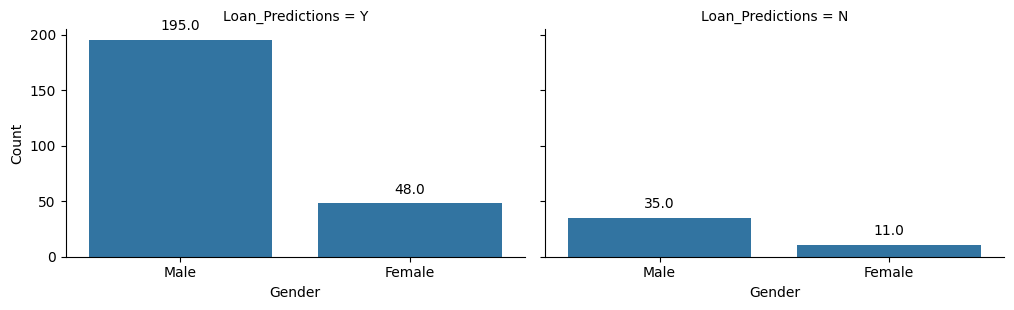

In [21]:
# Step 21 - Visualize loans by Gender

#Source: https://www.geeksforgeeks.org/python-seaborn-facetgrid-method/
grid = sns.FacetGrid(new_testdf, col='Loan_Predictions', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender', order=['Male', 'Female'])

#Source: https://stackoverflow.com/questions/58325443/how-to-annotate-bar-chart-with-values-different-to-those-from-get-height
for ax in grid.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

grid.set_axis_labels('Gender', 'Count')
plt.tight_layout()
plt.show()

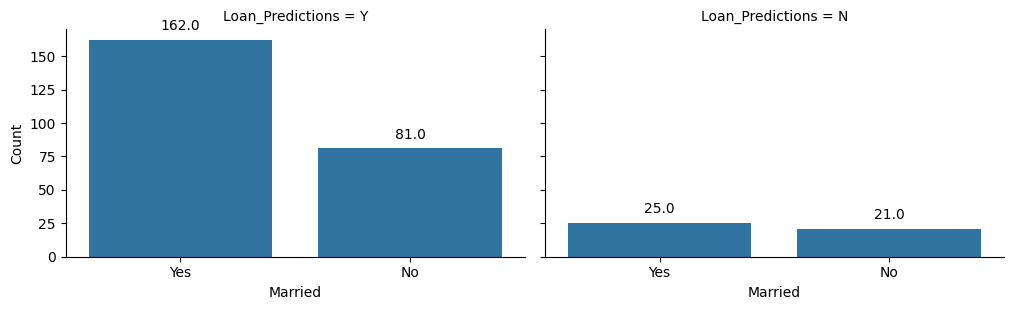

In [22]:
# Step 22 - Visualize loans by Married

grid = sns.FacetGrid(new_testdf, col='Loan_Predictions', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Married', order=['Yes', 'No'])

for ax in grid.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

grid.set_axis_labels('Married', 'Count')
plt.tight_layout()
plt.show()

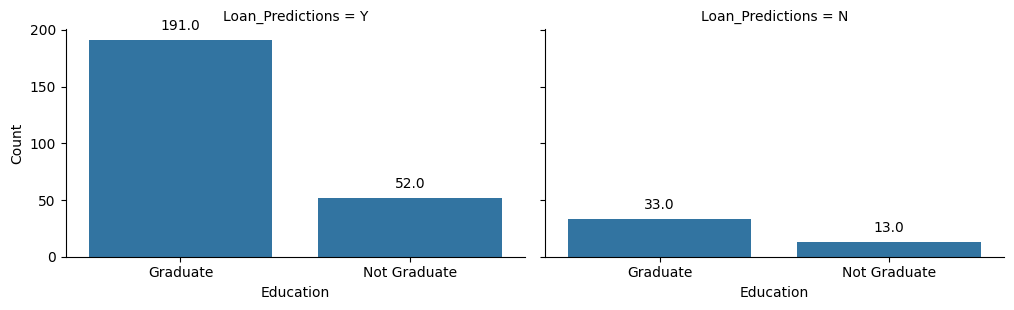

In [23]:
# Step 23 - Visualize loans by Education

grid = sns.FacetGrid(new_testdf, col='Loan_Predictions', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education', order=['Graduate', 'Not Graduate'])

for ax in grid.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

grid.set_axis_labels('Education', 'Count')
plt.tight_layout()
plt.show()

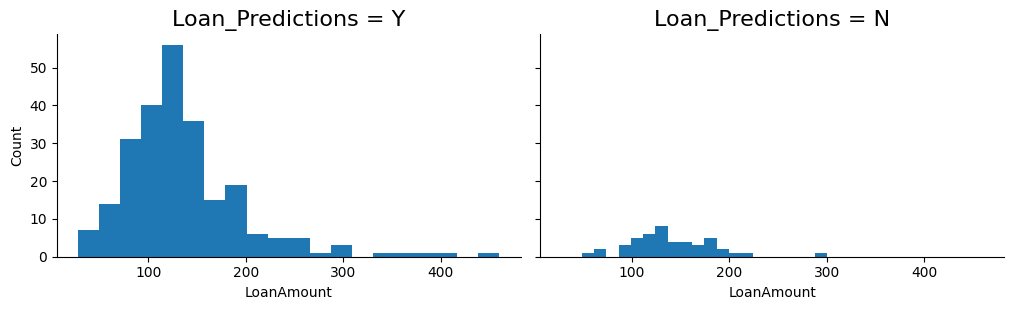

In [24]:
# Step 24 - Visualize loans by Loan Amount

grid = sns.FacetGrid(new_testdf, col='Loan_Predictions', height=3.2, aspect=1.6)
grid.map(plt.hist, 'LoanAmount', bins=20)

for ax in grid.axes.flat:
    ax.set_xlabel('LoanAmount')
    ax.set_ylabel('Count')
    ax.set_title(ax.get_title(), fontdict={'fontsize': 16})  # Optional: Increase title font size

plt.tight_layout()
plt.show()

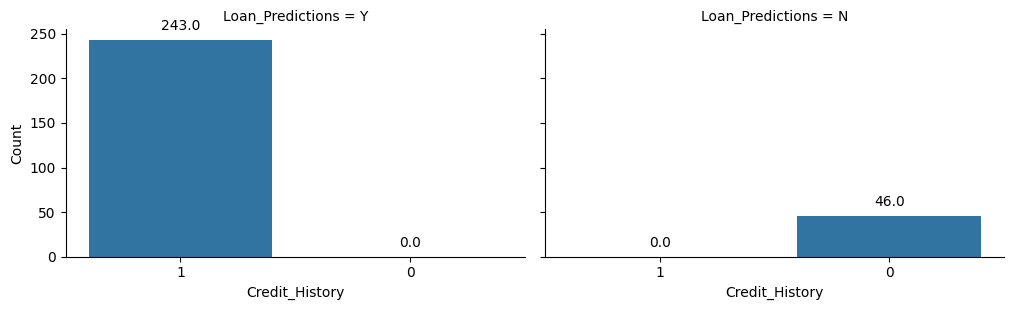

In [25]:
# Step 25 - Visualize loans by Credit History

grid = sns.FacetGrid(new_testdf, col='Loan_Predictions', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History', order=[1, 0])

for ax in grid.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

grid.set_axis_labels('Credit_History', 'Count')
plt.tight_layout()
plt.show()